In [1]:
import pandas as pd
abalone = pd.read_csv("abalone.csv", header=None)

In [2]:
 type(abalone)

pandas.core.frame.DataFrame

Get the first 5 records of the data including the headers

In [3]:
abalone.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


To know if there are any blanks in the data

In [ ]:
abalone.info()

Describe the data analytically

In [4]:
abalone.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [6]:
abalone.columns=["Sex", "Length", 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [7]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [8]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Since pandas dataframe works well with numerals, we are gonna drop the sex column from the data frame below

In [9]:
abalone = abalone.drop("Sex", axis=1)

In [10]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


<AxesSubplot:>

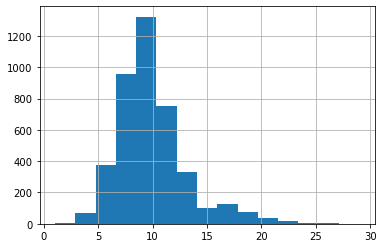

In [11]:
abalone["Rings"].hist(bins=15)

Find out about correlations between the features and the target

In [12]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.557123
Diameter          0.575005
Height            0.558109
Whole weight      0.540818
Shucked weight    0.421256
Viscera weight    0.504274
Shell weight      0.628031
Rings             1.000000
Name: Rings, dtype: float64

In [13]:
# Extract the data from the pandas dataframe
X = abalone.drop("Rings", axis=1)  #Exclude target
X = X.values  #not strictly necessary
y = abalone["Rings"]  #Extract the target
y = y.values  # not strictly necessary

In [14]:
type(X)

numpy.ndarray

In [16]:
# Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
# Predict for training data and calculate prediction error
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds=knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
print(rmse)

1.6776385361227941


In [23]:
# Predict for test data and calculate prediction error
# If lower then the model can generate well
# If higher then our model is overfitting
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
print(round(rmse, 2))

2.34


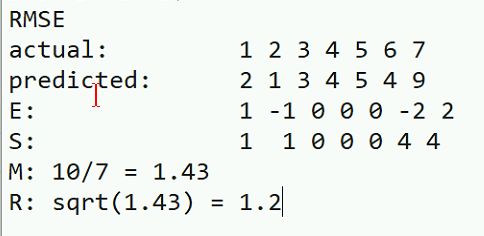